In [ ]:
# default_exp analysis

# Tools to analyze the results of Gate simulations

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import pandas as pd
import uproot as rt
import awkward as ak

from scipy.stats import moyal
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.stats import rv_continuous
# import pylandau


In [ ]:
#export
def get_edep_data(df, sensor=-1):
    """returns an array of energies deposited in each event (keV)"""
    
   
    
    # sum all energy deposited in each event and convert the result to keV
    if sensor == -1:
        edep = df.groupby(['eventID'])['edep'].sum()*1000
    else:
        edep = (df[df['volumeID'] == sensor].groupby(['eventID']))['edep'].sum()*1000
    return edep

In [ ]:
#export
def get_df_subentry2(root_file_name):
    """returns a dataframe that contains only subentry 2 data
    
    This subentry seems to contain all the relevant information"""
    
    df = pd.DataFrame()
    with rt.open(f'{root_file_name}:Hits') as tree:
        df = ak.to_pandas(tree.arrays())
    return df.xs(2, level='subentry')

In [ ]:
edep = get_edep_data(df2, sensor=0)

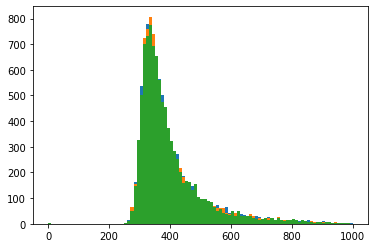

In [ ]:
_ = plt.hist(edep, bins=100, range=(0,1000))
_ = plt.hist(get_edep_data(df2, sensor=1), bins=100, range=(0,1000))
_ = plt.hist(get_edep_data(df2, sensor=2), bins=100, range=(0,1000))

In [ ]:
dfs =  ak.to_pandas(tree.arrays(), how=None)

In [ ]:
df2 = get_df_subentry2('results/TrackerHits.root')

In [ ]:
null_columns = [col for col in df2.columns if df2[col].max() == 0 and df2[col].min() == 0]
df2.drop(columns=null_columns, inplace=True)

,PDGEncoding,trackID,parentID,trackLocalTime,time,edep,stepLength,trackLength,posX,posY,...,level3ID,level4ID,level5ID,photonID,primaryID,sourcePosX,sourcePosY,sourcePosZ,eventID,volumeID
count,4.562900e+04,45629.000000,45629.000000,4.562900e+04,4.562900e+04,45629.000000,45629.000000,45629.000000,45629.000000,45629.000000,...,45629.0,45629.0,45629.0,45629.000000,45629.0,45629.000000,45629.0,45629.000000,45629.000000,45629.000000
mean,1.908527e+06,10.987508,0.960223,1.464417e-09,1.940371e-09,0.296742,0.363181,223.497559,0.055488,-57.637703,...,-1.0,-1.0,-1.0,0.280830,1.0,0.004950,250.0,-0.046819,5015.894212,0.997896
std,4.362800e+07,20.096203,4.755743,5.048027e-08,5.048043e-08,0.319023,0.208492,133.447800,8.878907,8.150845,...,0.0,0.0,0.0,0.693484,0.0,2.006979,0.0,1.987851,2894.433983,0.815088
min,1.100000e+01,1.000000,0.000000,1.497200e-16,1.582761e-09,0.000000,0.000000,0.000045,-100.000000,-67.750000,...,-1.0,-1.0,-1.0,0.000000,1.0,-7.322752,250.0,-8.309025,1.000000,0.000000
25%,2.212000e+03,1.000000,0.000000,2.566274e-10,1.626562e-09,0.137833,0.165015,39.152031,-2.134838,-67.625427,...,-1.0,-1.0,-1.0,0.000000,1.0,-1.348591,250.0,-1.411121,2506.000000,0.000000
50%,2.212000e+03,1.000000,0.000000,1.627099e-09,1.681395e-09,0.317167,0.500014,297.765167,0.034097,-57.750000,...,-1.0,-1.0,-1.0,0.000000,1.0,0.007777,250.0,-0.039674,5035.000000,1.000000
75%,2.212000e+03,26.000000,1.000000,1.684809e-09,1.736495e-09,0.367868,0.500090,307.781647,2.158438,-47.750000,...,-1.0,-1.0,-1.0,0.000000,1.0,1.370587,250.0,1.309437,7534.000000,2.000000
max,1.000140e+09,1459.000000,208.000000,1.078314e-05,1.078472e-05,11.303608,11.534828,377.004395,100.000000,-47.250000,...,-1.0,-1.0,-1.0,2.000000,1.0,7.556628,250.0,8.603308,9998.000000,2.000000


In [ ]:
single_value_columns = [col for col in df2.columns if df[col].max() ==  df[col].min()]
df2.drop(columns=single_value_columns, inplace=True)
df2.head()

,PDGEncoding,trackID,parentID,trackLocalTime,time,edep,stepLength,trackLength,posX,posY,...,momDirX,momDirY,momDirZ,level1ID,photonID,sourcePosX,sourcePosZ,eventID,volumeID,processName
entry,,,,,,,,,,,,,,,,,,,,,
0,2212,1,0,1.625228e-09,1.625228e-09,0.394049,0.500008,297.753906,-0.089870,-47.75,...,-0.022373,-0.999483,0.023074,0,2,-0.391837,0.482372,1,0,Transportation
1,2212,1,0,1.681641e-09,1.681641e-09,0.435780,0.500258,307.759064,-0.313312,-57.75,...,-0.025283,-0.999469,0.020532,-1,2,-0.391837,0.482372,1,1,Transportation
2,2212,1,0,1.738094e-09,1.738094e-09,0.393910,0.500265,317.764343,-0.565760,-67.75,...,-0.023668,-0.999491,0.021390,-1,2,-0.391837,0.482372,1,2,Transportation
3,2212,1,0,1.621733e-09,1.621733e-09,0.352901,0.500019,297.757568,-0.656078,-47.75,...,-0.002678,-0.999953,-0.009338,0,0,-1.324143,-3.748219,2,0,Transportation
4,2212,1,0,1.677973e-09,1.677973e-09,0.336591,0.500025,307.758057,-0.683030,-57.75,...,-0.000312,-0.999964,-0.008490,-1,0,-1.324143,-3.748219,2,1,Transportation


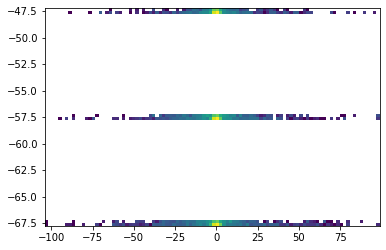

In [ ]:
_ = plt.hist2d(df2['posX']-df2['sourcePosX'], df2['posY'], bins=(100, 80), norm=mcolors.LogNorm())

In [ ]:
df2_sensor0 = df2[df2.volumeID == 0]

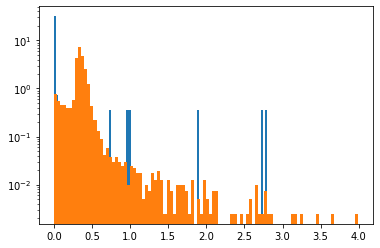

In [ ]:
_= plt.hist((df2_sensor0[(df2_sensor0['processName']=='Transportation') & (df2_sensor0['posY']==-47.25)]).edep,log=True, density=True, bins = 100)
_= plt.hist((df2_sensor0[(df2_sensor0['processName']=='Transportation') & (df2_sensor0['posY']==-47.75)]).edep,log=True, density=True,bins = 100)

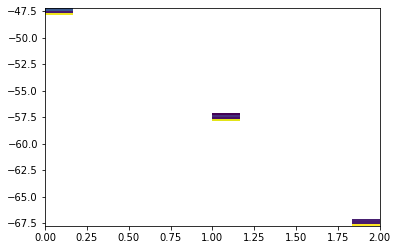

In [ ]:
from matplotlib.pyplot import hist2d
import matplotlib.colors as mcolors
_= hist2d(df2.volumeID, df2.posY, bins=(12,100), norm=mcolors.LogNorm())

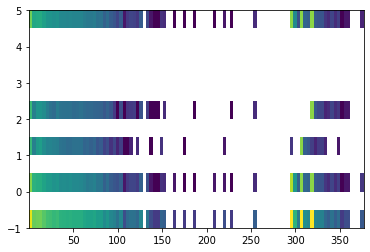

In [ ]:
_ = hist2d(df.trackLength, df.volumeID, bins=(100, 12), norm=mcolors.LogNorm())

In [ ]:
#export
def find_max_nonzero(array_hist):
    previous = -1
    preprevious  = -1
    p_b = -1
    pp_b = -1
    for v, b in zip(array_hist[0],array_hist[1]):
        if preprevious != 0 and previous == 0 and v == 0:
            return math.ceil(p_b)
        pp_b = p_b
        p_b = b
        preprevious = previous
        previous = v
    

In [ ]:
#export
def find_range(param):
    array_hist = plt.hist(param, bins=100)
    upper_limit = find_max_nonzero(array_hist)
    ret = -1
    while upper_limit:
        ret = upper_limit
        array_hist = plt.hist(param[param < upper_limit], bins=100)
        upper_limit = find_max_nonzero(array_hist)
    return ret

In [ ]:
class landau_gen(rv_continuous):
    r"""A Landau continuous random variable.
    %(before_notes)s
    Notes
    -----
    The probability density function for `Landau` is:
    
    for a real number :math:`x`.
    %(after_notes)s
    This distribution has utility in high-energy physics and radiation
    detection. It describes the energy loss of a charged relativistic
    particle due to ionization of the medium . 
    """
    
    def _pdf(self, x):
        return pylandau.landau_pdf(np.float64(x))


landau = landau_gen(name="landau")

In [ ]:
edep = get_edep_data('results/TrackerHits.root')
edep

Series([], Name: edep, dtype: float32)

In [ ]:
#hide
from nbdev.export import notebook2script; notebook2script()

Converted 00_macro_tools.ipynb.
Converted 01_analysis.ipynb.
Converted 02_scanners.ipynb.
Converted index.ipynb.


In [ ]:
loc,scale =  moyal.fit(edep)
print(loc, scale)

31.21577349933282 55.7683201223829


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1797: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))
<ipython-input-148-8412bcfafa05>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return pylandau.landau_pdf(np.float64(x))


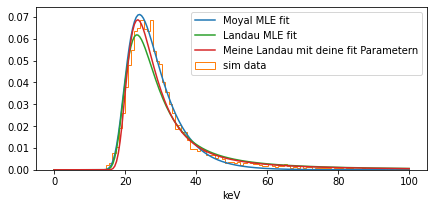

In [ ]:
fig1, ax1 = plt.subplots(figsize=(7, 3))
x = np.linspace(0, 100, 200)
ax1.plot(x, moyal.pdf(x, loc, scale), label = 'Moyal MLE fit')
_ = ax1.hist(edep[edep < 100], bins = 100, histtype='step', density= True, label = 'sim data')
ax1.plot(x, landau.pdf(x, 23.973851592546183, 2.921658875656049), label='Landau MLE fit')
ax1.plot(x, landau.pdf(x, 24.13, 2.629), label='Meine Landau mit deine fit Parametern')
#ax1.scatter(GeV8_data.energy, GeV8_data.counts/4400, label = 'data', marker='o',  c = 'green', alpha = 0.5)
plt.xlabel('keV')
ax1.legend()

In [ ]:
loc,scale =  moyal.fit(edep[edep < 50])
print(loc, scale)

24.01278866991769 3.401363731100145


In [ ]:
m = np.mean(edep)
em = stats.sem(edep)
tm = stats.tmean(edep, limits=(edep.min(),np.mean(edep) + 1 * np.std(edep) + 2))
etm = stats.tsem(edep, limits=(edep.min(),np.mean(edep) + 1 * np.std(edep) + 2))
print(f'Mean:        {m},       Error on mean: {em}, SNR: {m/em}')
print(f'Trimmed mean {tm}, Error on trimmed mean: {etm}, SNR: {tm/etm}')
#print(stats.mode(np.round(edep, 0)))


Mean:        35.96607971191406,       Error on mean: 1.420998077392578, SNR: 25.310435168152406
Trimmed mean 32.43781762604408, Error on trimmed mean: 0.1832643962128964, SNR: 177.00010638379206


In [ ]:
## edep.to_csv('simdata.csv', sep =',', mode='w')